In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib notebook
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

### Data Source
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Data Description
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Objective
To find the best classifier model to predict if a customer will get diabetes or not based on her present feature values representing various health parameters.  

In [36]:
#Importing file
path = r'C:\Users\punee\python_practise\ML\KNN'
diabetes = pd.read_csv(path + '\diabetes.csv')

Getting a sample of top data: head() function is used to print top few rows of the dataframe.

In [37]:
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [38]:
# Size of the data
diabetes.shape

(768, 9)

In [39]:
# Data types of all the variables
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB




*We can see the data types of all the features. It's good that we don't have to deal with any missing data here as there are no null values.*

In [56]:
# Target variable class 
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

We have a good proportion of positive class in our data. Positive class is the target label which we try to predict (person having a diabetes)

In [41]:
# Descriptive measures of variables
diabetes.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

**Summary insights**

* This step must be included in any data science project. 

* Analyse all metrics for each variable if you could one by one and try to find out if it meets your intuition about the variable's behaviour in the real life. It helps in understanding first, the data distribution and second, if any unexpected behavior is shown by any metric reflecting data anomalies in the data. For e.g. here we can see 0  filled under *min* column while it makes sense for Pregnancies (young lady with no child) but no one can have 0 Glucose, BloodPressure, SkinThickness, Insulin and BMI. You might have noticed that you must have some basic knowledge about the demographics of the problem you are handling. For instance, in this case you have noticed 0 values being impossible for majority of features but if you didn't know about their behaviour in the real life you would have skipped it. Doing EDA without understanding real life impacts of demographics and thus not correcting them can prove even advanced EDA representation look foolish. So, we will deal with unexpected noise. 

* It's good to compare mean and median (50%) values. Higher proximity in the values indicate higher tendency for them being drawn from normal distribution. Lots of algorithm and inferential stats assume normal distribution of feature values while making results.

* Another way to know if there are any missing values in different variable vectors is to look at the count column here. It indicates the number of non-empty values in that variable (which is 786 for each case = size of the length of data).


## Dealing with outliers

**We have noticed that we need to take care of outliers. Dealing with them demand a quality skill set. How to deal with them ?**

1) If outliers/missing values are less in numbers without having any serious impact on our analysis then it can be deleted but if these are insignificant in numbers then deletion can' be made as it would result in loss of useful information.

2) If data is normally distributed then it should be replaced with the mean values. Uniform distribution can be checked using tests, boxplot, histogram, qqplots etc.

3) If data is not normally distributed or if that column's values are dependent on categories which they belong to then we will make use of median values.

It preserves the wholesome trend/originality of the metric's distribution/nature.

4) Sometimes, outliers/missing values can be computed mathematically/statistically from other or/and the same column(s) which will be more accurate then the traditional computational method.

#### Note: Data preparation includes dealing with outliers and anomalies first before dealing with missing values. Since we don't have missing values we will deal with outliers only though the steps are more or less tha same.

Sometimes outliers predict new data science but usually it indicates data entry faults. They can be ignored if their influence is negligible otherwise their effect needs to be analysed. As we have only 786 rows so their influence can be a lot. It's good practice to repeat your analysis with and without the outliers.If they have minimal effect on the results, and you can't figure out why they're there, it's reasonable to replace them with missing values and move on. However, if they have a substantial effect on your results, you shouldn't drop them without justification. You'll need to figure out what caused them (e.g., a data entry error) and disclose that you removed them in your write-up.

#Too much theory of theory, let's dive straight back to your work. 

<IPython.core.display.Javascript object>


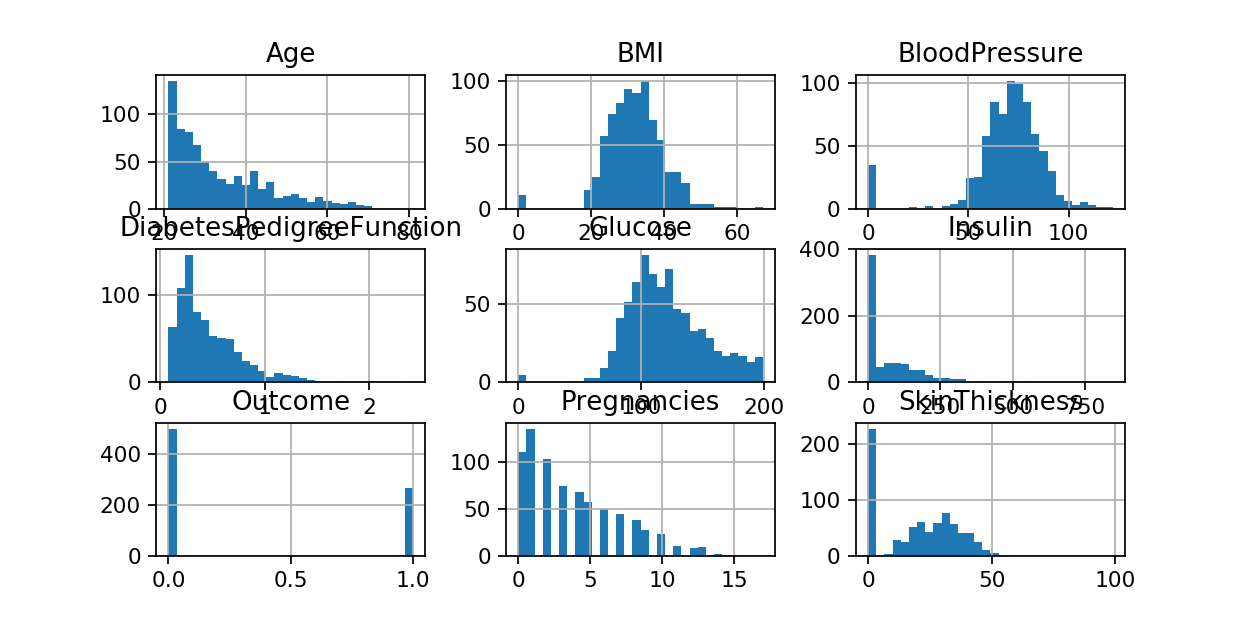

In [42]:
# Let's analyse the distribution of data
diabetes.hist(figsize=[8,4], bins=30)
plt.show()

*Glucose, BMI, BloodPressure seems to be normally distributed while Insulin and SkinThickness seems non-normal. You can see stacks at 0 values heights of which indicates the level of outliers in our data.*

In [43]:
# Imputations based on the distribution
diabetes.loc[diabetes['Glucose'] == 0, 'Glucose'] = diabetes['Glucose'].mean()
diabetes.loc[diabetes['Insulin'] == 0, 'Insulin'] = diabetes['Insulin'].median()
diabetes.loc[diabetes['BMI'] == 0, 'BMI'] = diabetes['BMI'].mean()
diabetes.loc[diabetes['SkinThickness'] == 0, 'SkinThickness'] = diabetes['SkinThickness'].median()
diabetes.loc[diabetes['BloodPressure'] == 0, 'BloodPressure'] = diabetes['BloodPressure'].mean()

Finally our data has been cleaned and can be used to make final inferences based on it.

In [44]:
# Finding summary now
diabetes.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  121.681605   30.436016  44.000  99.75000   
BloodPressure             768.0   72.254807   12.115932  24.000  64.00000   
SkinThickness             768.0   27.334635    9.229014   7.000  23.00000   
Insulin                   768.0   94.652344  105.547598  14.000  30.50000   
BMI                       768.0   32.450805    6.875374  18.200  27.50000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    31.2500  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

<IPython.core.display.Javascript object>


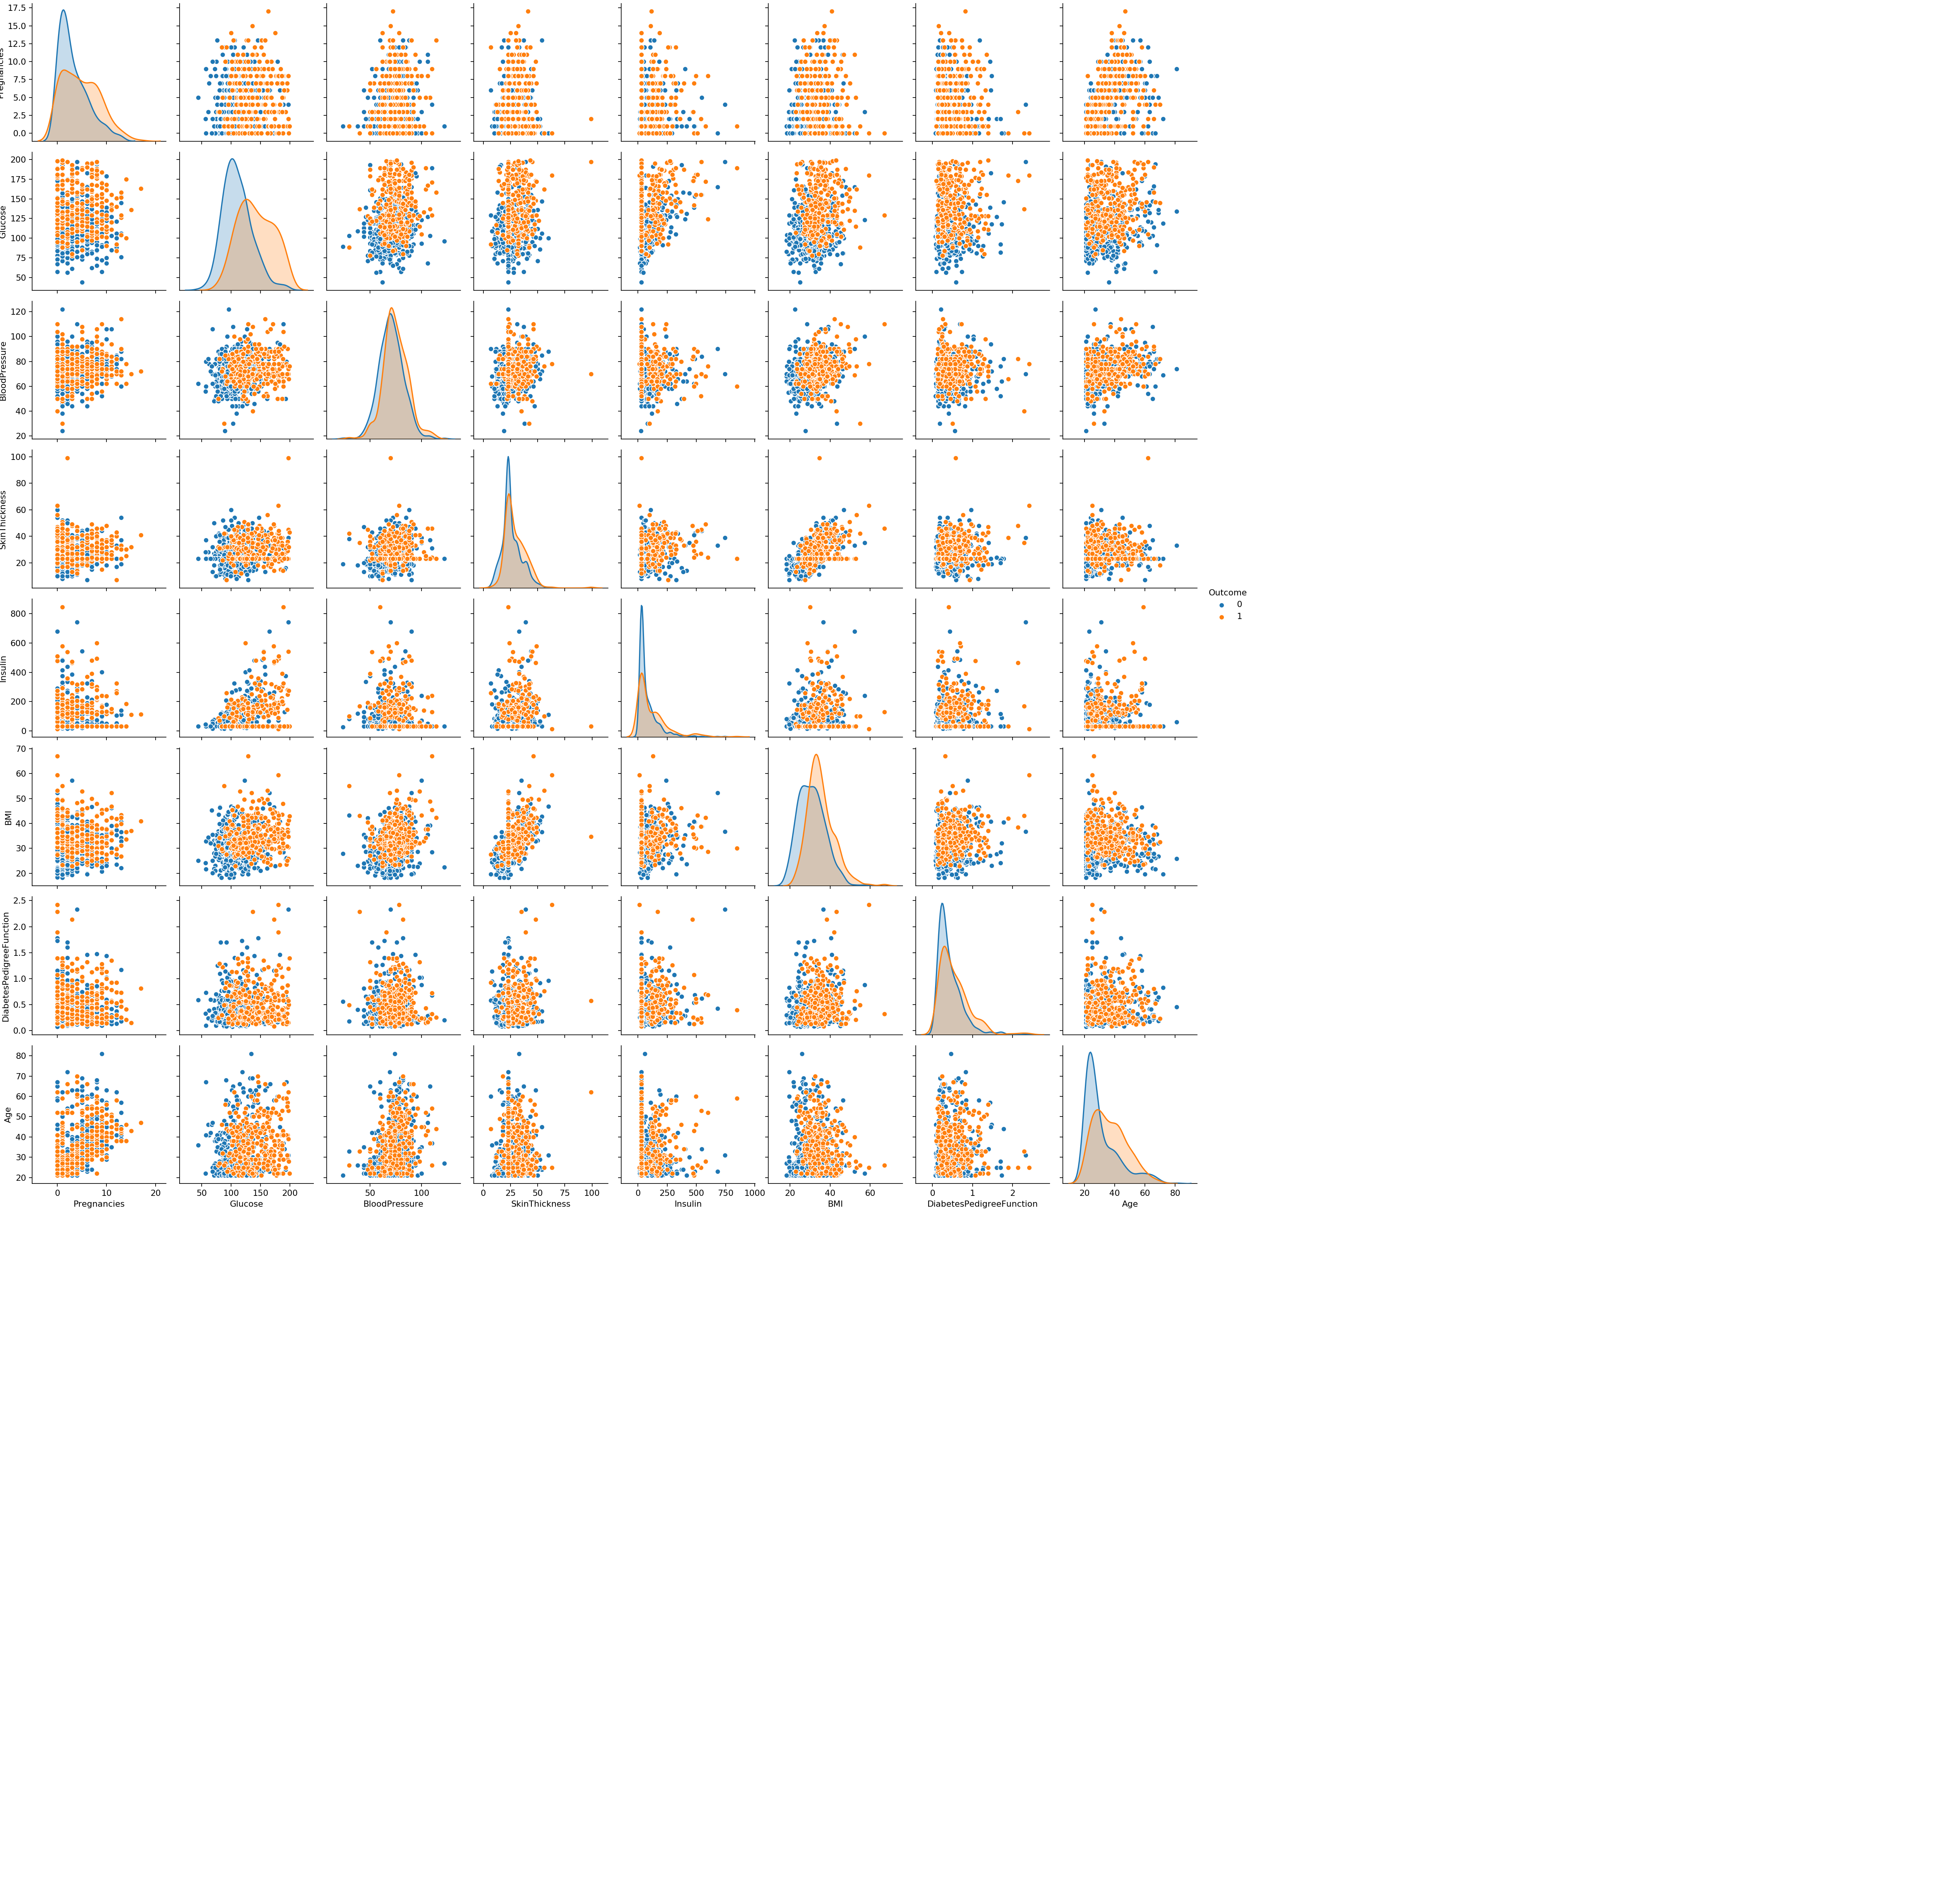

In [45]:
# Let's see the scatter plot matrix
rcParams['figure.figsize'] = 8, 4
sn.pairplot(diabetes, hue = 'Outcome')

In [49]:
# Positive correlation
diabetes.corr()[diabetes.corr()<0]

Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                       NaN      NaN            NaN            NaN   
Glucose                           NaN      NaN            NaN            NaN   
BloodPressure                     NaN      NaN            NaN            NaN   
SkinThickness                     NaN      NaN            NaN            NaN   
Insulin                     -0.055697      NaN      -0.022049            NaN   
BMI                               NaN      NaN            NaN            NaN   
DiabetesPedigreeFunction    -0.033523      NaN            NaN            NaN   
Age                               NaN      NaN            NaN            NaN   
Outcome                           NaN      NaN            NaN            NaN   

                           Insulin  BMI  DiabetesPedigreeFunction       Age  \
Pregnancies              -0.055697  NaN                 -0.033523       NaN   
Glucose                        NaN  NaN                       NaN       NaN   
BloodPressure            -0.022049  NaN                       NaN       NaN   
SkinThickness                  NaN  NaN                       NaN       NaN   
Insulin                        NaN  NaN                       NaN -0.015413   
BMI                            NaN  NaN                       NaN       NaN   
DiabetesPedigreeFunction       NaN  NaN                       NaN       NaN   
Age                      -0.015413  NaN                       NaN       NaN   
Outcome                        NaN  NaN                       NaN       NaN   

                          Outcome  
Pregnancies                   NaN  
Glucose                       NaN  
BloodPressure                 NaN  
SkinThickness                 NaN  
Insulin                       NaN  
BMI                           NaN  
DiabetesPedigreeFunction      NaN  
Age                           NaN  
Outcome                       NaN

In [50]:
# Negative correlation
diabetes.corr()[diabetes.corr()>0]

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208984       0.032568   
Glucose                      0.127964  1.000000       0.219666       0.172361   
BloodPressure                0.208984  0.219666       1.000000       0.152458   
SkinThickness                0.032568  0.172361       0.152458       1.000000   
Insulin                           NaN  0.357081            NaN       0.238188   
BMI                          0.021546  0.231478       0.281231       0.546958   
DiabetesPedigreeFunction          NaN  0.137106       0.000371       0.142977   
Age                          0.544341  0.266600       0.326740       0.054514   
Outcome                      0.221898  0.492908       0.162986       0.189065   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies                    NaN  0.021546                       NaN   
Glucose                   0.357081  0.231478                  0.137106   
BloodPressure                  NaN  0.281231                  0.000371   
SkinThickness             0.238188  0.546958                  0.142977   
Insulin                   1.000000  0.189031                  0.178029   
BMI                       0.189031  1.000000                  0.153508   
DiabetesPedigreeFunction  0.178029  0.153508                  1.000000   
Age                            NaN  0.025748                  0.033561   
Outcome                   0.148457  0.312254                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266600  0.492908  
BloodPressure             0.326740  0.162986  
SkinThickness             0.054514  0.189065  
Insulin                        NaN  0.148457  
BMI                       0.025748  0.312254  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

**Insights**

* With age almost all parameters increases except BMI which goes up to a level then remains constant and DiabetesPedigreeFunction.
* Glucose and Insulin has a positive relationship.
* Pregnancies and Age has the highest correlation as ladies tend to become more aged they have more kids.
* Insulin and Pregnancies have negative correlation.

## MODEL BUILDING PROCESS

In any machine learning model which I had known till now first step in building any model is to split your data into training and testing set. Algorithm is fitted on training data and testing data is used for predictions.

In our project training data will have 75 % data with the test data having 25.

We will be using KNN classification algortihm provided by Sklearn module. KNN is a type of supervised non-parametric learning algorithm which performs best on simple data.

In [57]:
# Pre-processing data
X = diabetes.loc[:, diabetes.columns != 'Outcome']
y = diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, train_size = 0.75)

#### Applying knn on raw data

In [76]:
# Fitting knn
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
print('Accuracy of raw model on training_set is {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of raw model on test_set is {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of raw model on training_set is 0.79
Accuracy of raw model on test_set is 0.76


In [60]:
# Tuning accuracy for various k values

accuracy = []
model_performance = {}
for k in [1, 3, 5, 10, 15, 21, 30, 35, 50]:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    score_training = knn.score(X_train, y_train)
    score_test = knn.score(X_test, y_test)
    model_performance[k] = [score_training, score_test]
model_performance

{1: [1.0, 0.765625],
 3: [0.8402777777777778, 0.765625],
 5: [0.7899305555555556, 0.7552083333333334],
 10: [0.7777777777777778, 0.7395833333333334],
 15: [0.7743055555555556, 0.7760416666666666],
 21: [0.7517361111111112, 0.7708333333333334],
 30: [0.7569444444444444, 0.7760416666666666],
 35: [0.7465277777777778, 0.8020833333333334],
 50: [0.75, 0.75]}

Model gives best results at k = 10. At k = 15, it overgeneralize the test data. It might increase for K between 10 and 15.

Tuning K is actually the game of finding the best trade-off between model complexity and misclassification error. Low values tend to overfit training data forming very complex separator between two predictor labels which can't be deployed in real life. As K increases misclassification error increases, forms stable decision boundaries and generalizes the performance on test data. But after a specific value for K, misclassifcation errors can become very high due to high underfit on training data forming very simple decision boundaries. So we need to find an ideal trade-off between model complexity and misclassification errors

In [21]:
# Tuning accuracy for various k between 10 and 15.

accuracy = []
model_performance = {}
for k in [10, 11, 12, 13, 14, 15]:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    score_training = knn.score(X_train, y_train)
    score_test = knn.score(X_test, y_test)
    model_performance[k] = [score_training, score_test]
model_performance

{10: [0.7777777777777778, 0.7395833333333334],
 11: [0.78125, 0.7395833333333334],
 12: [0.7795138888888888, 0.7552083333333334],
 13: [0.7621527777777778, 0.78125],
 14: [0.7638888888888888, 0.78125],
 15: [0.7743055555555556, 0.7760416666666666]}

At k = 12, model performs the best for raw data. We haven't applied feature scaling yet.

Feature scaling becomes an important part preprocessing when your input data matrix parameters vary greatly amongst themselves.feature scaling is a neccessary part of preprocessing. This part removes impact of noisy data and optimizes the performance of the cost function in selecting the best coefficants for the most optimized model's predictors. It transforms input values to range between two small values. (-1, 1), (-2, 2) or even (-3, 3) according to *Professor Andre NG's course of Machine Learning.*

In [74]:
# feature scaling  -- 2nd part

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the same scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))


Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.78


**You can compare the raw performance on unscaled and scaled data.**
* unscaled (0.79, 0.76)
* scaled (0.80, 78)

In [66]:
# Tuning for best K on scaled data
model_performance_scaled = {}
for k in [7, 8, 9, 10, 11, 12, 13, 14, 15]:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train)
    score_training = knn.score(X_train_scaled, y_train)
    score_test = knn.score(X_test_scaled, y_test)
    model_performance_scaled[k] = [score_training, score_test]
model_performance_scaled

{7: [0.8055555555555556, 0.7604166666666666],
 8: [0.7864583333333334, 0.7552083333333334],
 9: [0.7847222222222222, 0.7916666666666666],
 10: [0.78125, 0.7864583333333334],
 11: [0.7777777777777778, 0.78125],
 12: [0.7881944444444444, 0.7760416666666666],
 13: [0.7829861111111112, 0.8020833333333334],
 14: [0.7847222222222222, 0.7916666666666666],
 15: [0.7847222222222222, 0.8125]}

for k = 12, it is giving the best results which should be taken as the final k. 

Notice that for unscaled data we also found k = 12 as the best parameter. This data is simple and it's features also don't have variant data ranges so feature scaling doesn't have impact high enough to change the best K though it's still better approach. In complex data with hundreds of features feature scaling becomes a necessity.

<IPython.core.display.Javascript object>


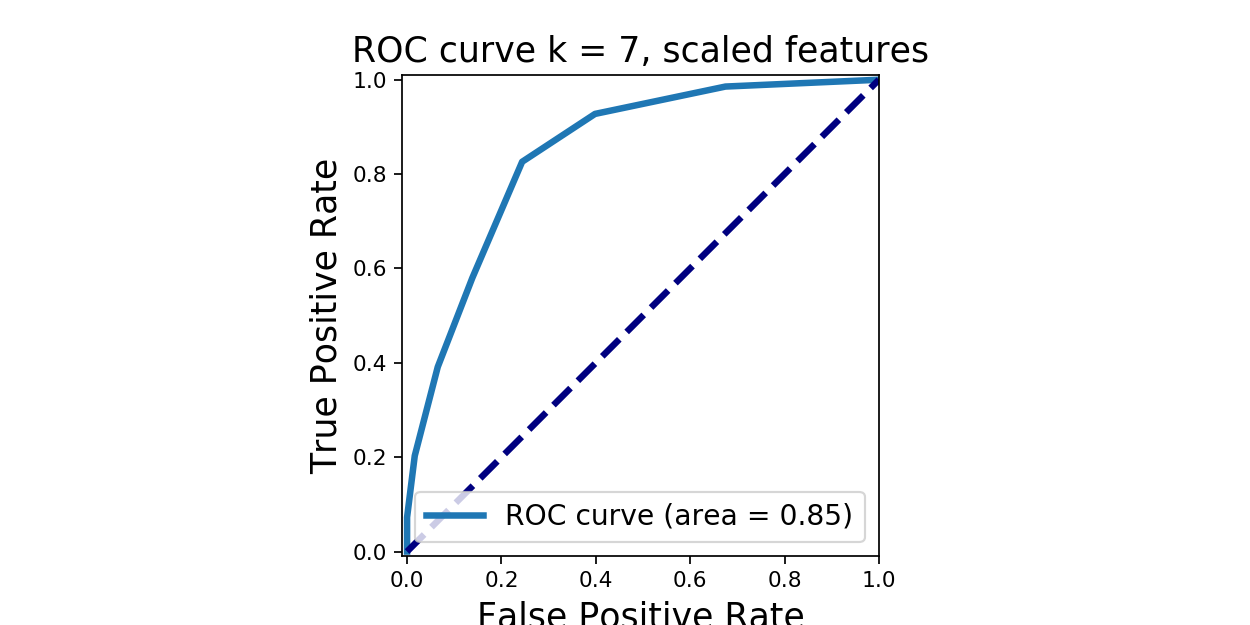

<IPython.core.display.Javascript object>


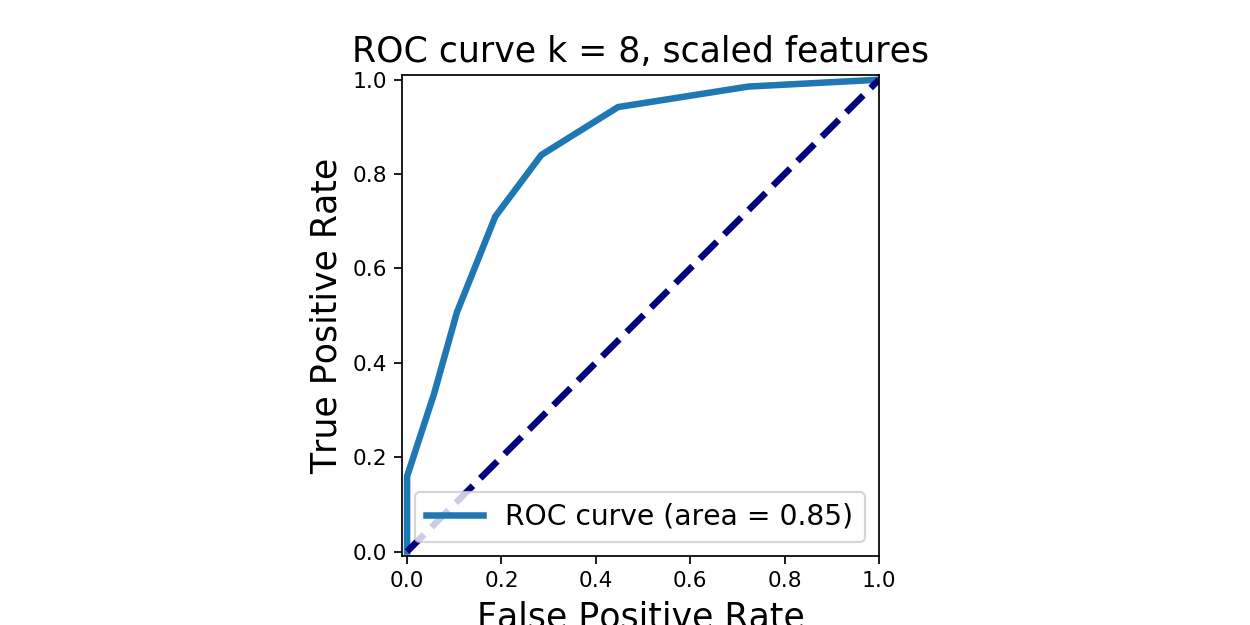

<IPython.core.display.Javascript object>


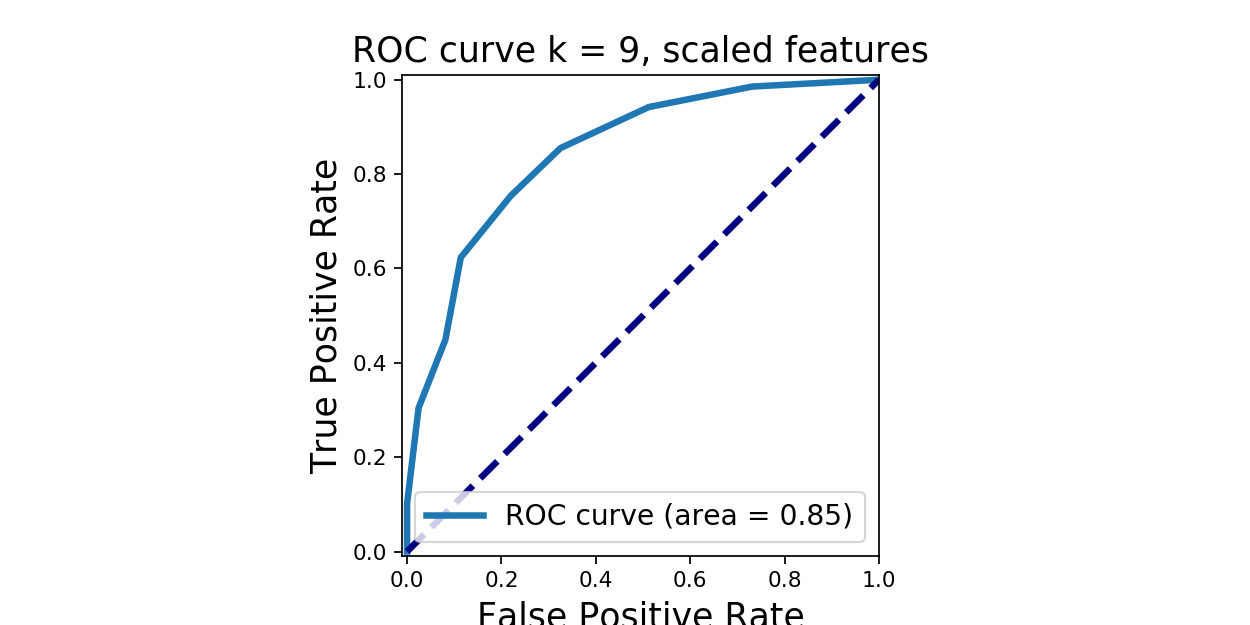

<IPython.core.display.Javascript object>


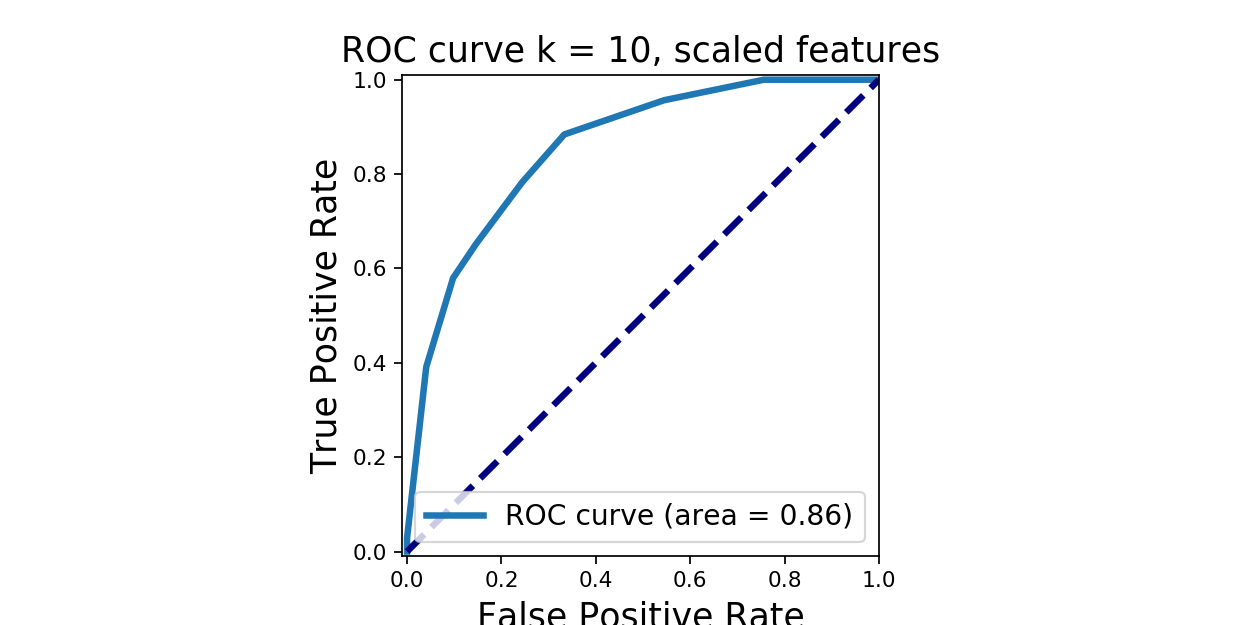

<IPython.core.display.Javascript object>


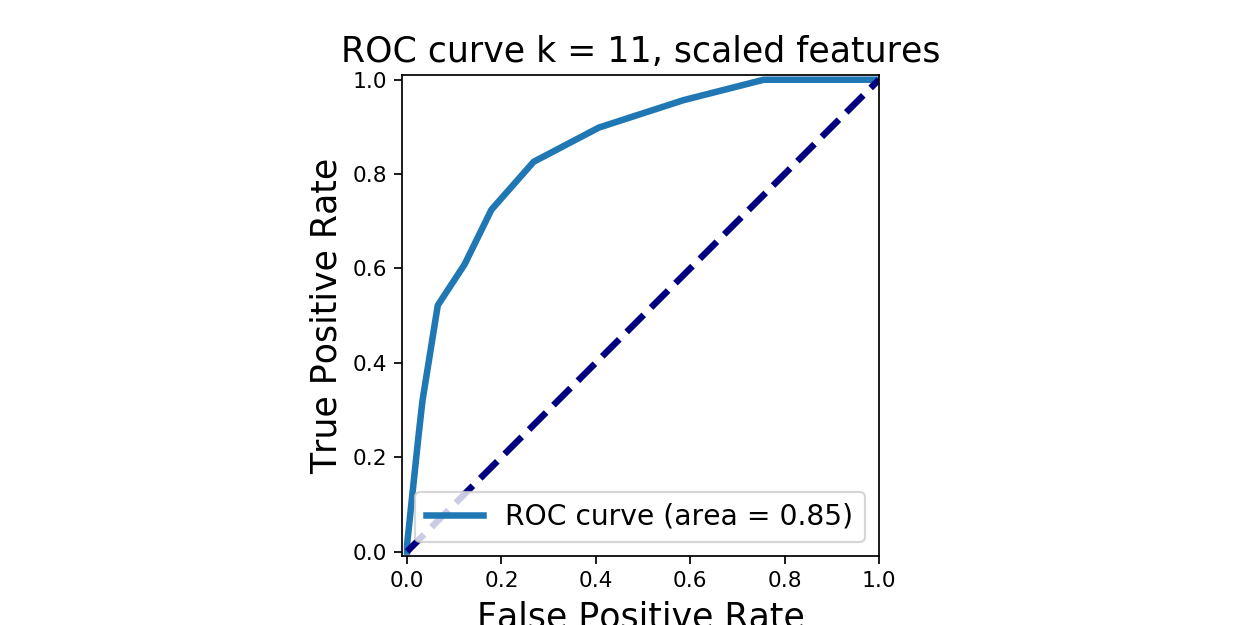

<IPython.core.display.Javascript object>


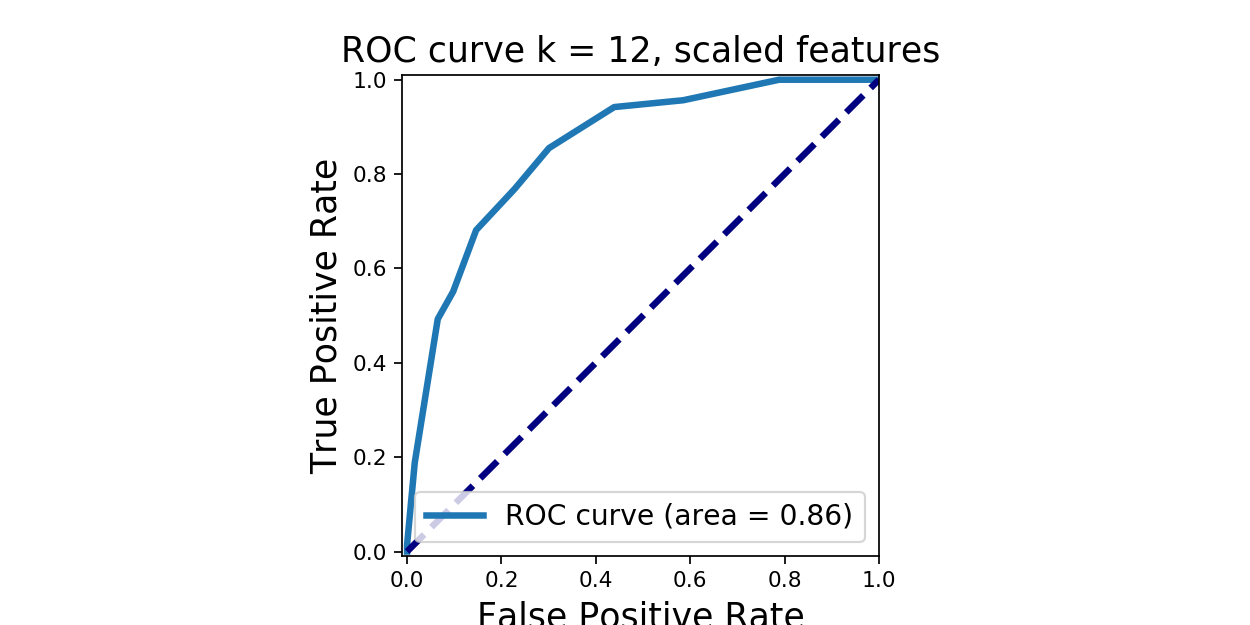

<IPython.core.display.Javascript object>


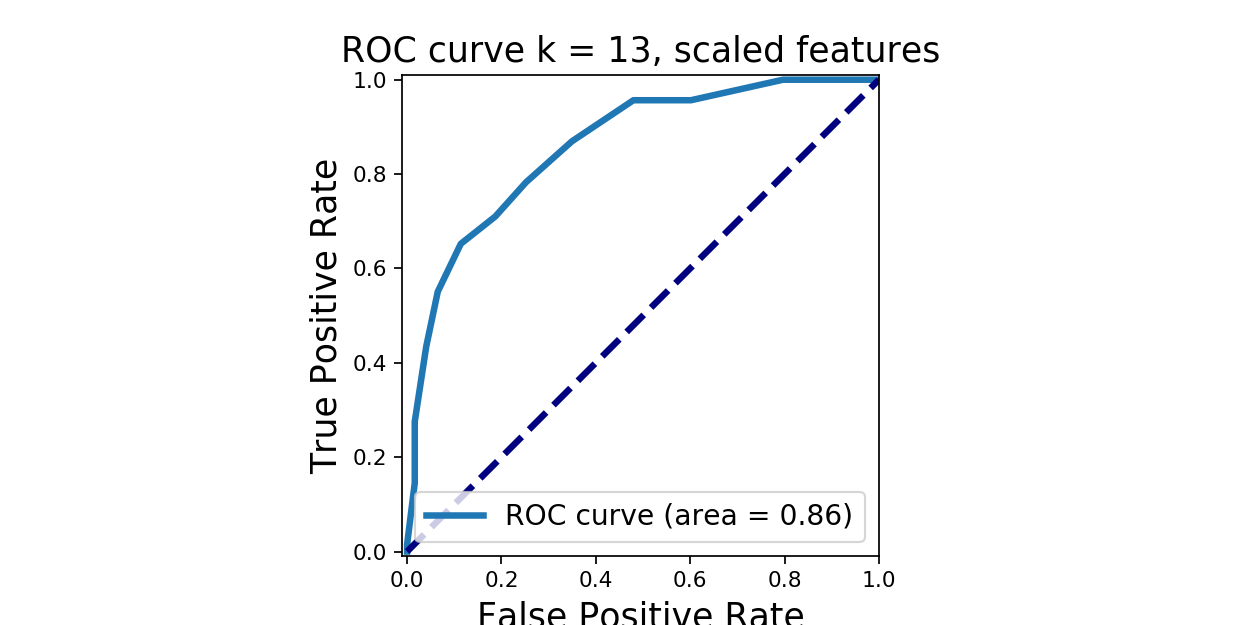

<IPython.core.display.Javascript object>


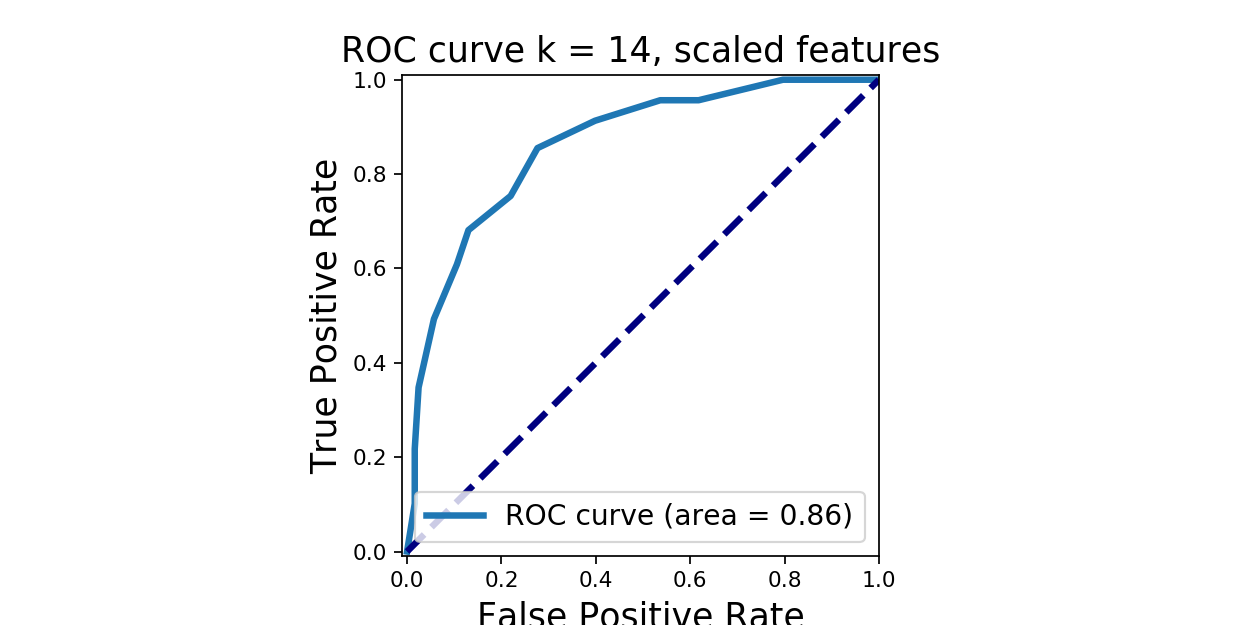

<IPython.core.display.Javascript object>


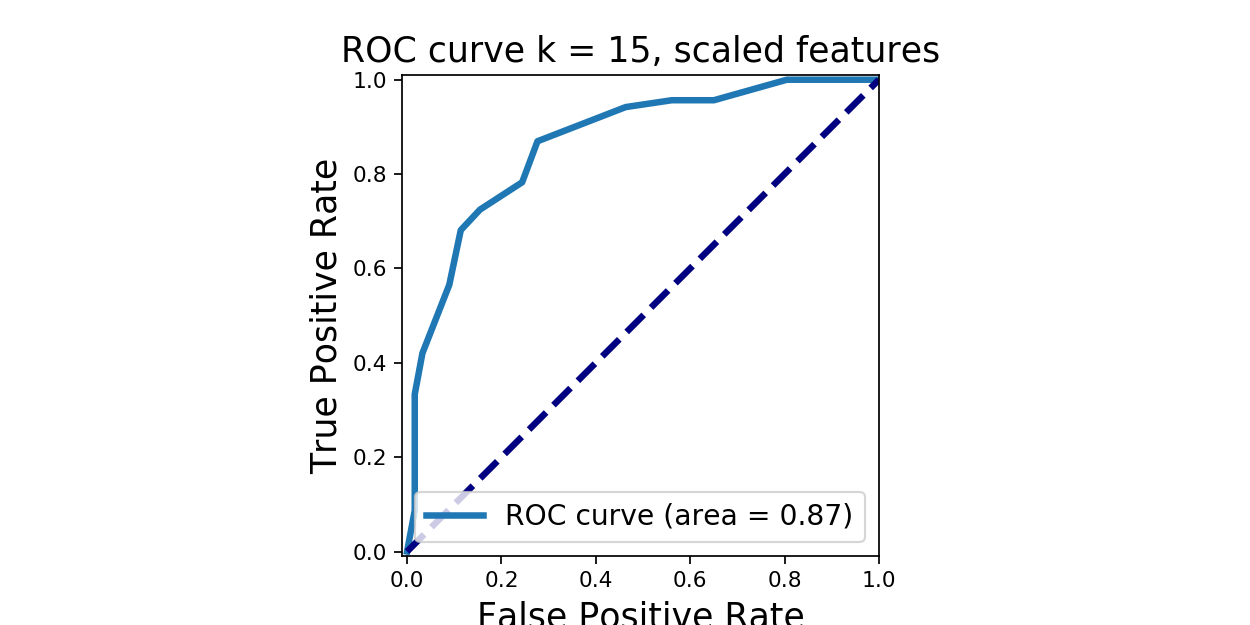

In [67]:
for k in range(7, 16):
    y_test_knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train).predict_proba(X_test_scaled)[:,1]
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_knn)
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve k = {}, scaled features'.format(k), fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

In [69]:
for k in range(7,16):
    y_test_knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train).predict(X_test_scaled)
    print('For k='+str(k)+classification_report(y_test, y_test_knn))
    print('Accuracy for k =' + str(k) +' is equal to ' +str(KNeighborsClassifier(n_neighbors=k).fit(X_train_scaled, y_train).score(X_test_scaled, y_test)))


For k=7              precision    recall  f1-score   support

           0       0.79      0.86      0.82       123
           1       0.70      0.58      0.63        69

    accuracy                           0.76       192
   macro avg       0.74      0.72      0.73       192
weighted avg       0.76      0.76      0.75       192

Accuracy for k =7 is equal to 0.7604166666666666
For k=8              precision    recall  f1-score   support

           0       0.76      0.89      0.82       123
           1       0.73      0.51      0.60        69

    accuracy                           0.76       192
   macro avg       0.75      0.70      0.71       192
weighted avg       0.75      0.76      0.74       192

Accuracy for k =8 is equal to 0.7552083333333334
For k=9              precision    recall  f1-score   support

           0       0.81      0.89      0.84       123
           1       0.75      0.62      0.68        69

    accuracy                           0.79       192
   macro 